In [1]:
import cv2
from os import listdir
from os.path import join, exists, isdir
import os
from utils import *

In [6]:
data_dir = r'/media/dataserver/workspace/blanca/datasets/helen/trainset'

In [12]:
sample_names = [x.split('.')[0] for x in listdir(data_dir) if 
                (not isdir(join(data_dir, x))) and x.split('.')[1] == 'pts']

print(len(sample_names))#, sorted(sample_names))

4000


In [8]:
def read_pts_file(filename):
    """A helper function to read ibug .pts landmarks from a file."""
    lines = open(filename).read().splitlines()
    if int(lines[1:2][0].split('n_points:')[-1]) != 68:
        print ('No 68 landmark format')
        return None
    lines = lines[3:71]

    landmarks = []
    for l in lines:
        coords = l.split()
        landmarks.append([float(coords[0]), float(coords[1])])
    return landmarks

def save_landmarks_as_pts(landmarks, path, f_name):
    # write data in a file.
    file_w = open(join(path, '{}.pts'.format(f_name)), 'w')

    header = ['version: 1 \n', \
              'n_points:  68 \n', \
              '{ \n']
    text = landmarks
    footer = ['}']

    file_w.writelines(header)
    file_w.writelines([str(i[0]) + ' ' + str(i[1]) + '\n' for i in text])
    file_w.writelines(footer)
    file_w.close() #to change file access modes
    
# def flip_landmarks(landmarks, cols):
#     mid = cols/2
#     flipped_landmarks = []
#     for lnd in reversed(landmarks):
#         if lnd[0] < mid:
#             diff = mid - lnd[0]
#             lnd_flip = [mid+diff, lnd[1]]
#         else:
#             diff = lnd[0] - mid
#             lnd_flip = [mid-diff, lnd[1]]
#         flipped_landmarks.append(lnd_flip)
#     return flipped_landmarks

def read_68lmap_file(filename):
    """Read a helper mapping of 68 ibug landmarks for mirroring .pts landmarks."""
    lines = open(filename).read().splitlines()
    lines = lines[1:69]

    mapping = {}
    for l in lines:
        mapping[int(l.split(':')[0])] = int(l.split(':')[1].split(',')[0])
    return mapping

def flip_landmarks(landmarks, cols, mapping):
    mid = cols/2
    flipped_landmarks = [None] * 68
    for _, lnd in enumerate(landmarks):
        if lnd[0] < mid:
            diff = mid - lnd[0]
            lnd_flip = [mid+diff, lnd[1]]
        else:
            diff = lnd[0] - mid
            lnd_flip = [mid-diff, lnd[1]]
        flipped_landmarks[mapping[_]] = lnd_flip
    return flipped_landmarks

    
f = 'mirror_68_landmarks.txt'
mapping = read_68lmap_file(f)

# op = 'delete-datasets/helen-mirrored/output/testset/landmarks/3266693323_1.pts'
# ol = read_pts_file(op)
# rows, cols, channels = im1.shape

# olm = flip_landmarks(ol, cols, mapping)
# olm

In [11]:
sample_names = sorted(sample_names)
for sample_name in sample_names:
    print('Computing %s' %sample_name)
    img = cv2.imread(join(data_dir, '{}.jpg'.format(sample_name)))
    rows, cols, channels = img.shape

    plt_filename = join(data_dir, '{}.pts'.format(sample_name))
    landmarks = read_pts_file(plt_filename)

    landmarks_flipped = flip_landmarks(landmarks, cols, mapping)
    save_landmarks_as_pts(landmarks_flipped, data_dir, '{}_mirror'.format(sample_name))

Computing 100032540_1
Computing 100040721_1
Computing 100040721_2
Computing 1002681492_1
Computing 1004467229_1
Computing 100466187_1
Computing 100591971_1
Computing 100843687_1
Computing 1010057391_1
Computing 1012675629_1
Computing 1012675629_2
Computing 1018882799_1
Computing 1019068877_1
Computing 1021890651_1
Computing 1030333538_1
Computing 103236168_1
Computing 103236168_2
Computing 1033312112_1
Computing 1033312288_1
Computing 1037255513_1
Computing 103770709_1
Computing 103887554_1
Computing 10405146_1
Computing 10405299_1
Computing 10405424_1
Computing 10406776_1
Computing 10407038_1
Computing 104074861_1
Computing 1045887134_1
Computing 1045890692_1
Computing 1050957686_1
Computing 1050957686_2
Computing 105300174_1
Computing 105300174_2
Computing 105455387_1
Computing 105538305_1
Computing 106242334_1
Computing 106326063_1
Computing 106348540_1
Computing 106393487_1
Computing 1063957157_1
Computing 10697993_1
Computing 1070861406_1
Computing 107288942_1
Computing 107473045_

Computing 171907511_1
Computing 171907511_2
Computing 17192052_1
Computing 172183000_1
Computing 172375929_1
Computing 172972325_1
Computing 173153701_2
Computing 173153769_1
Computing 173153923_2
Computing 17349955_1
Computing 173744986_1
Computing 173744986_2
Computing 173808384_1
Computing 173808384_2
Computing 17464842_1
Computing 1752922795_1
Computing 1753022691_1
Computing 1753768714_1
Computing 1753941007_1
Computing 1757432712_1
Computing 175991309_2
Computing 178046512_1
Computing 178428696_1
Computing 1784763527_1
Computing 1793202210_1
Computing 179820698_1
Computing 1799534916_1
Computing 1800576628_1
Computing 1801024299_1
Computing 1801024299_2
Computing 1801024299_3
Computing 180986261_1
Computing 1809894544_2
Computing 1812732159_1
Computing 181707205_1
Computing 181839385_1
Computing 182573594_1
Computing 182804431_1
Computing 183204955_1
Computing 1843394852_1
Computing 1844911065_1
Computing 1844926255_1
Computing 1844930191_1
Computing 1845765682_1
Computing 184676

Computing 2203693721_2
Computing 2203694817_1
Computing 2203695965_1
Computing 2203696399_2
Computing 2204494382_1
Computing 2204494382_2
Computing 2204495618_1
Computing 2204495618_2
Computing 2204502578_1
Computing 2205474871_1
Computing 2205474871_2
Computing 2205474871_3
Computing 2208472833_1
Computing 2208472833_2
Computing 2209809995_1
Computing 2210601282_1
Computing 221068652_2
Computing 221068652_3
Computing 2210716757_1
Computing 2210851928_1
Computing 2211065399_1
Computing 2211065399_2
Computing 2211542693_1
Computing 221174143_1
Computing 221238636_1
Computing 221272641_1
Computing 221278406_1
Computing 2212956363_1
Computing 2214566485_1
Computing 221458225_1
Computing 2214699699_1
Computing 2214772465_1
Computing 2215829570_1
Computing 2216045499_1
Computing 221629697_1
Computing 2216370944_1
Computing 2216480518_1
Computing 2218537300_1
Computing 2219165887_1
Computing 2220556464_1
Computing 2220556464_2
Computing 2220706683_1
Computing 2221495758_1
Computing 222244440

Computing 2404966827_1
Computing 2404969301_1
Computing 2405521888_2
Computing 2405798840_1
Computing 2405801774_1
Computing 2406130609_1
Computing 2406435030_1
Computing 2407195618_1
Computing 2407746151_1
Computing 2407762189_1
Computing 2407771006_1
Computing 2408549321_1
Computing 2408599550_1
Computing 2408609508_1
Computing 2409386512_1
Computing 2410521422_1
Computing 2410522334_1
Computing 2411561802_1
Computing 2411620252_1
Computing 2414075021_1
Computing 2414792473_1
Computing 2415425614_1
Computing 241618266_1
Computing 2416254762_1
Computing 2416614295_1
Computing 2417379685_1
Computing 2418314368_1
Computing 2419189561_1
Computing 2419679570_1
Computing 2420389746_1
Computing 2420857139_1
Computing 2421145346_1
Computing 2421887901_1
Computing 2422195369_1
Computing 2423457662_1
Computing 2423457666_1
Computing 2425505427_1
Computing 2425505427_2
Computing 2425803315_1
Computing 2426066819_1
Computing 2426066823_1
Computing 2426631349_1
Computing 2426747542_1
Computing 24

Computing 2620035751_6
Computing 2620035751_7
Computing 2620035751_8
Computing 2620035751_9
Computing 2620748776_1
Computing 2622481517_1
Computing 2622481517_2
Computing 2622481519_1
Computing 2622481529_1
Computing 2622481529_2
Computing 2623755106_1
Computing 2624015355_1
Computing 2624814777_1
Computing 2625290035_1
Computing 262545392_1
Computing 262545511_1
Computing 2626551854_1
Computing 2628518257_1
Computing 2628518621_1
Computing 2632393389_1
Computing 2634041063_1
Computing 2634864392_1
Computing 2634865648_1
Computing 2634866872_1
Computing 2635473457_1
Computing 2635506982_1
Computing 263567973_1
Computing 2637014787_1
Computing 2637859146_1
Computing 2638234993_1
Computing 2639853121_1
Computing 2642751678_1
Computing 2642886952_1
Computing 2643349347_1
Computing 2643601988_1
Computing 2643601988_2
Computing 2645235152_1
Computing 2646055201_1
Computing 2649826959_1
Computing 2650258108_1
Computing 2651816235_1
Computing 2651829477_1
Computing 2651953293_1
Computing 2651

Computing 2850227095_1
Computing 2850228639_1
Computing 2850359046_1
Computing 2851029498_1
Computing 2851040724_1
Computing 2851042664_1
Computing 2851045896_1
Computing 2851148894_1
Computing 2852014535_1
Computing 2853173185_1
Computing 2853185850_1
Computing 2853873126_1
Computing 2854289847_1
Computing 2857823310_1
Computing 2857823310_2
Computing 2858826857_1
Computing 2858827135_1
Computing 2859531900_1
Computing 2861015002_1
Computing 2861845083_1
Computing 2861948045_1
Computing 2861948517_1
Computing 2862378871_1
Computing 2862779132_1
Computing 2862780316_1
Computing 2863358045_1
Computing 2863670139_1
Computing 2864260911_1
Computing 2864812753_1
Computing 2864812753_2
Computing 2864905534_1
Computing 2865881929_1
Computing 2865980402_1
Computing 2867434117_1
Computing 2867659261_1
Computing 2868155068_1
Computing 2868566775_1
Computing 2869128864_1
Computing 2869939639_1
Computing 2869939639_2
Computing 2869939639_3
Computing 2871609349_1
Computing 2872584528_1
Computing 2

### ============================================================
### testing:

TypeError: Image data can not convert to float

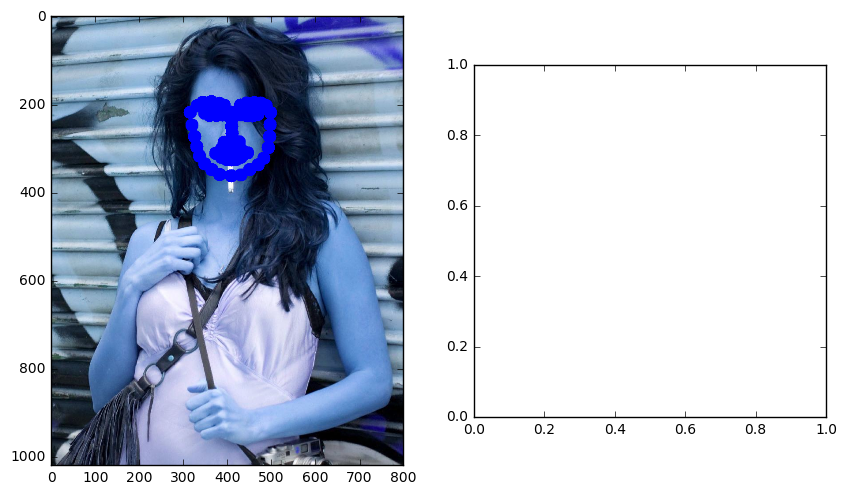

In [39]:
%matplotlib inline
import pylab as plt

for p in landmarks:
    point = (int(p[0]), int(p[1]))
    cv2.circle(img, point, 15, (0, 0, 255), -1)

img_flip = cv2.imread(join(data_dir, '{}_mirror.jpg'.format(sample_name)))
for p in landmarks_flipped:
    point = (int(p[0]), int(p[1]))
    cv2.circle(img_flip, point, 5, (0, 0, 255), -1)
fig = plt.figure(figsize = (10, 10))
fig.add_subplot(121).imshow(img)
fig.add_subplot(122).imshow(img_flip)

#### Comparison dlib vs GT landmarks

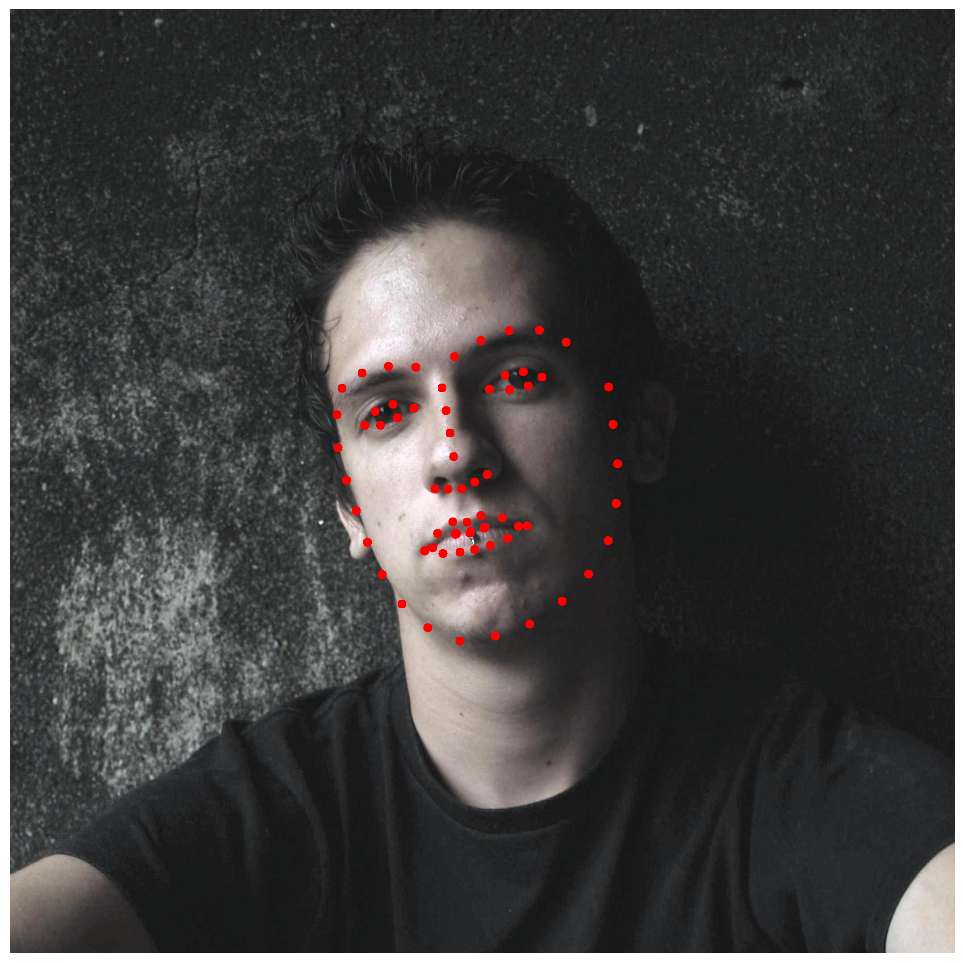

In [55]:
%matplotlib inline
import pylab as plt

# GT landmarks
g1 = 'datasets/helen/testset'
f1 = '3266693323_1_mirror.pts'
i1 = '3266693323_1_mirror.jpg'

# dlib landmarks
g2 = 'delete-datasets/helen-mirrored/output/testset/landmarks'
f2 = '3266693323_1_mirror.pts'
i2 = '3266693323_1_mirror.jpg'

p1 = os.path.join(g1, f1)
p2 = os.path.join(g2, f2)

i1 = os.path.join(g1, i1)
i2 = os.path.join(g2, i2)

l1 = read_pts_file(p1)
l2 = read_pts_file(p2)

im1 = cv2.imread(i1)
im2 = cv2.imread(i1)

for p in l2:
    point = (int(p[0]), int(p[1]))
    cv2.circle(im2, point, 10, (0, 0, 255), -1)
    
plot_im(im2)

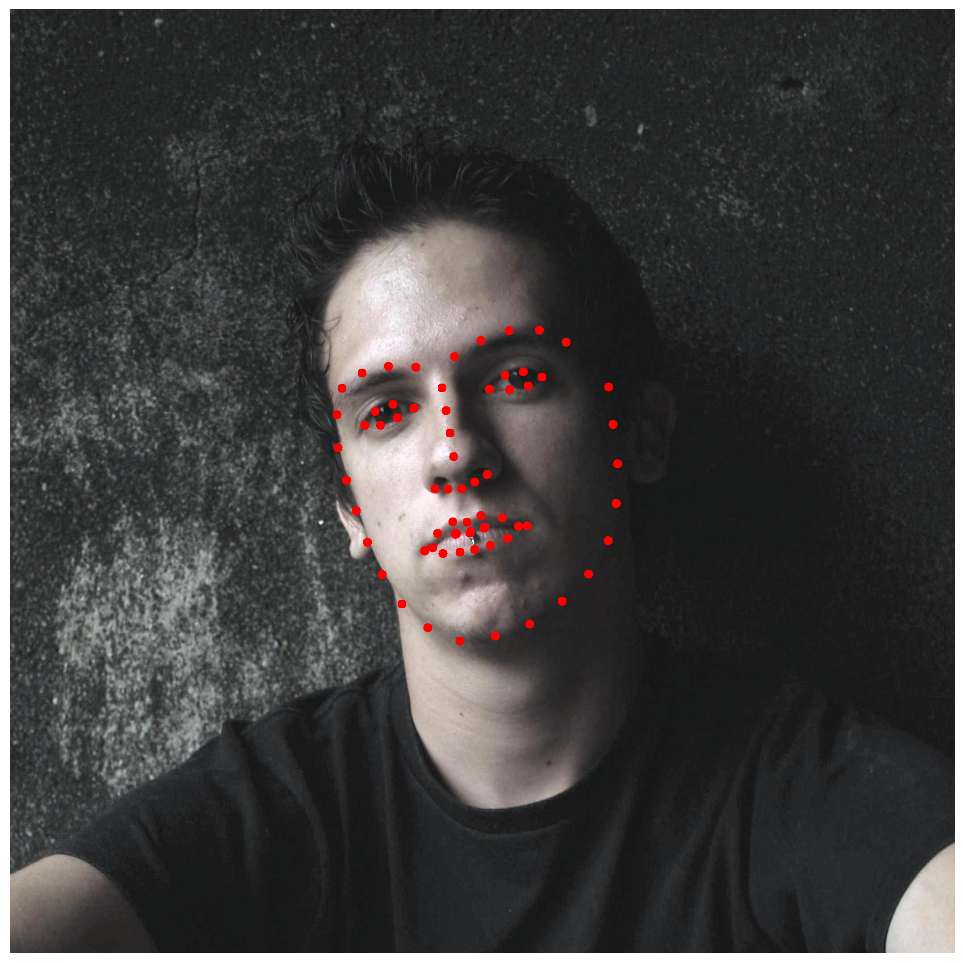

In [56]:
im3 = cv2.imread(i1)
for p in ol:
    point = (int(p[0]), int(p[1]))
    cv2.circle(im3, point, 10, (0, 0, 255), -1)
    
plot_im(im2)

In [ ]:
# op = 'delete-datasets/helen-mirrored/output/testset/landmarks/3266693323_1.pts'
# ol = read_pts_file(op)
# rows, cols, channels = im1.shape

# olm = flip_landmarks(ol, cols, mapping)
# olm